# Homework

    Note: sometimes your answer doesn't match one of the options exactly. That's fine. Select the option that's closest to your solution.

Dataset

For this homework, we'll use the Car Fuel Efficiency dataset. Download it from here.

You can do it with wget:

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').
Preparing the dataset

Use only the following columns:

    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'
!wget $data -O car_fuel_efficiency.csv

--2025-10-07 12:03:15--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853,70K  4,26MB/s    in 0,2s    

2025-10-07 12:03:16 (4,26 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [3]:
df = pd.read_csv('car_fuel_efficiency.csv')
len(df)

9704

In [4]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [6]:
cols = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]

df = df[cols]

In [7]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


## Exploratory data analysis

## EDA

    Look at the fuel_efficiency_mpg variable. Does it have a long tail?


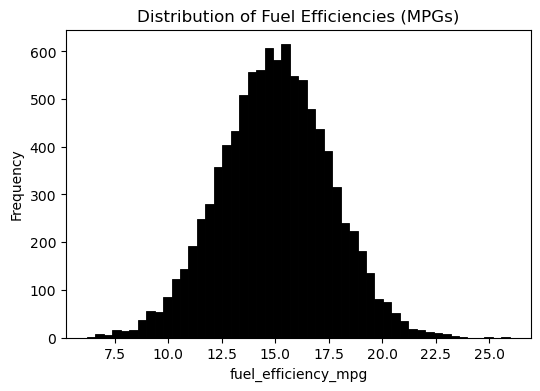

In [8]:
plt.figure(figsize=(6, 4))

sns.histplot(df.fuel_efficiency_mpg, bins=50, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('fuel_efficiency_mpg')
plt.title('Distribution of Fuel Efficiencies (MPGs)')

plt.show()

## Question 1

There's one column with missing values. What is it?

    'engine_displacement'
    'horsepower'
    'vehicle_weight'
    'model_year'


In [9]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

## Question 2

What's the median (50% percentile) for variable 'horsepower'?

    49
    99
    149
    199


In [10]:
df.horsepower.median()

np.float64(149.0)

## Validation framework

## Prepare and split the dataset

    Shuffle the dataset (the filtered one you created above), use seed 42.
    Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

# Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good


In [11]:
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [12]:
def shuffle_and_split(df, random_seed=42, val_ratio=0.2, test_ratio=0.2):
    np.random.seed(random_seed)

    n = len(df)

    n_val = int(val_ratio * n)
    n_test = int(test_ratio * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    return df_train, df_val, df_test

df_train, _, _ = shuffle_and_split(df)

In [13]:
mean_df_train_horsepower = df_train.horsepower.mean()
mean_df_train_horsepower

np.float64(149.54476367006487)

In [14]:
df_zero = df.fillna(0)
df_mean = df.fillna(mean_df_train_horsepower)

In [15]:
df_train_zero, df_val_zero, df_test_zero = shuffle_and_split(df_zero)
df_train_mean, df_val_mean, df_test_mean = shuffle_and_split(df_mean)

In [16]:
y_train_zero = df_train_zero.fuel_efficiency_mpg.values
y_val_zero = df_val_zero.fuel_efficiency_mpg.values
y_test_zero = df_test_zero.fuel_efficiency_mpg.values

y_train_mean = df_train_mean.fuel_efficiency_mpg.values
y_val_mean = df_val_mean.fuel_efficiency_mpg.values
y_test_mean = df_test_mean.fuel_efficiency_mpg.values


y_train_log_zero = np.log1p(y_train_zero)
y_val_log_zero = np.log1p(y_val_zero)
y_test_log_zero = np.log1p(y_test_zero)

y_train_log_mean = np.log1p(y_train_mean)
y_val_log_mean = np.log1p(y_val_mean)
y_test_log_mean = np.log1p(y_test_mean)

'''del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']'''

"del df_train['fuel_efficiency_mpg']\ndel df_val['fuel_efficiency_mpg']\ndel df_test['fuel_efficiency_mpg']"

## Linear Regression

In [17]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

## Baseline solution

In [18]:
base = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
]

In [19]:
def prepare_X(df, replace_nan_with=0):
    df_num = df[base]
    df_num = df_num.fillna(replace_nan_with)
    X = df_num.values
    return X

In [20]:
X_train_zero = prepare_X(df_train_zero)
w_0_zero, w_zero = train_linear_regression(X_train_zero, y_train_zero)
y_pred_train_zero = w_0_zero + X_train_zero.dot(w_zero)

X_val_zero = prepare_X(df_val_zero)
y_pred_val_zero = w_0_zero + X_val_zero.dot(w_zero)

X_test_zero = prepare_X(df_test_zero)
y_pred_test_zero = w_0_zero + X_test_zero.dot(w_zero)


X_train_mean = prepare_X(df_train_mean)
w_0_mean, w_mean = train_linear_regression(X_train_mean, y_train_mean)
y_pred_train_mean = w_0_mean + X_train_mean.dot(w_mean)

X_val_mean = prepare_X(df_val_mean)
y_pred_val_mean = w_0_mean + X_val_mean.dot(w_mean)

X_test_mean = prepare_X(df_test_mean)
y_pred_test_mean = w_0_mean + X_test_mean.dot(w_mean)

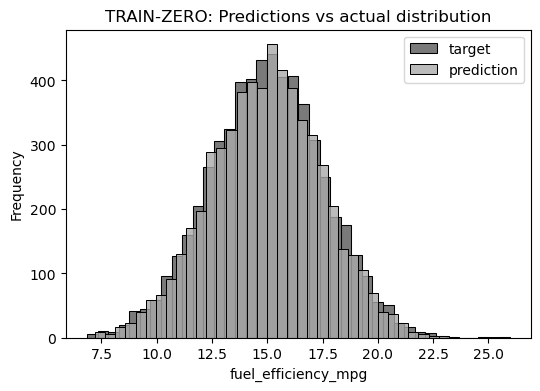

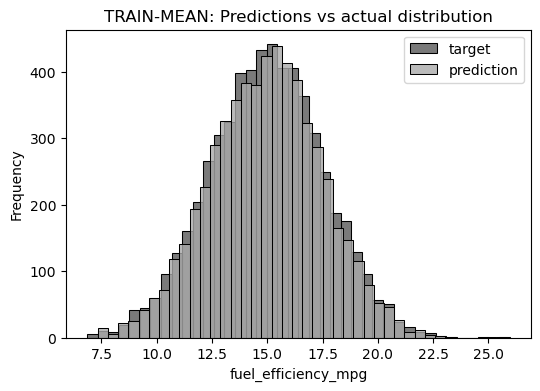

In [21]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train_zero, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_train_zero, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
#plt.xlabel('Log(Price + 1)')
plt.xlabel('fuel_efficiency_mpg')
plt.title('TRAIN-ZERO: Predictions vs actual distribution')

plt.show()

plt.figure(figsize=(6, 4))

sns.histplot(y_train_mean, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_train_mean, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
#plt.xlabel('Log(Price + 1)')
plt.xlabel('fuel_efficiency_mpg')
plt.title('TRAIN-MEAN: Predictions vs actual distribution')

plt.show()

In [22]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [23]:
rmse_train_zero = rmse(y_train_zero, y_pred_train_zero)
rmse_val_zero = rmse(y_val_zero, y_pred_val_zero)
rmse_test_zero = rmse(y_test_zero, y_pred_test_zero)

rmse_train_mean = rmse(y_train_mean, y_pred_train_mean)
rmse_val_mean = rmse(y_val_mean, y_pred_val_mean)
rmse_test_mean = rmse(y_test_mean, y_pred_test_mean)

In [24]:
def print_results(rnd=2):
    print("Training -------- Zero: %s Mean: %s" % (round(rmse_train_zero, rnd), round(rmse_train_mean, rnd)))
    print("+"*60)
    print("VALIDATION--- ZERO: %s Mean: %s" % (round(rmse_val_zero, rnd), round(rmse_val_mean, rnd)))
    print("+"*60)
    print("Test -------------- Zero: %s Mean: %s" % (round(rmse_test_zero, rnd), round(rmse_test_mean, rnd)))

print_results()

Training -------- Zero: 0.52 Mean: 0.46
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
VALIDATION--- ZERO: 0.52 Mean: 0.46
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Test -------------- Zero: 0.52 Mean: 0.46


## Simple feature engineering

In [25]:
'''def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X'''

"def prepare_X(df):\n    df = df.copy()\n    features = base.copy()\n\n    df['age'] = 2017 - df.year\n    features.append('age')\n\n    df_num = df[features]\n    df_num = df_num.fillna(0)\n    X = df_num.values\n    return X"

In [26]:
'''X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation', rmse(y_val, y_pred))'''

"X_train = prepare_X(df_train)\nw_0, w = train_linear_regression(X_train, y_train)\n\ny_pred = w_0 + X_train.dot(w)\nprint('train', rmse(y_train, y_pred))\n\nX_val = prepare_X(df_val)\ny_pred = w_0 + X_val.dot(w)\nprint('validation', rmse(y_val, y_pred))"

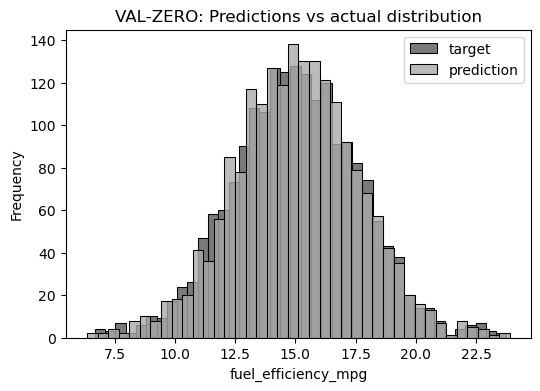

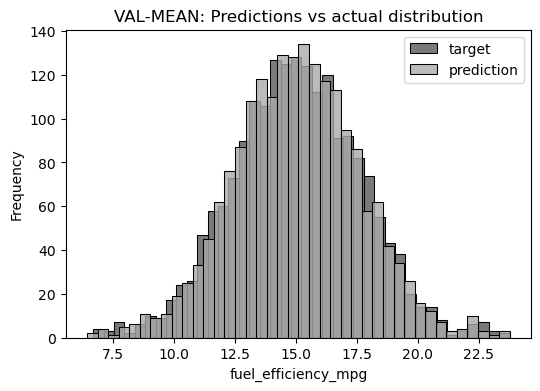

In [27]:
plt.figure(figsize=(6, 4))


sns.histplot(y_val_zero, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_val_zero, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('fuel_efficiency_mpg')
plt.title('VAL-ZERO: Predictions vs actual distribution')

plt.show()

plt.figure(figsize=(6, 4))


sns.histplot(y_val_mean, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_val_mean, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('fuel_efficiency_mpg')
plt.title('VAL-MEAN: Predictions vs actual distribution')

plt.show()

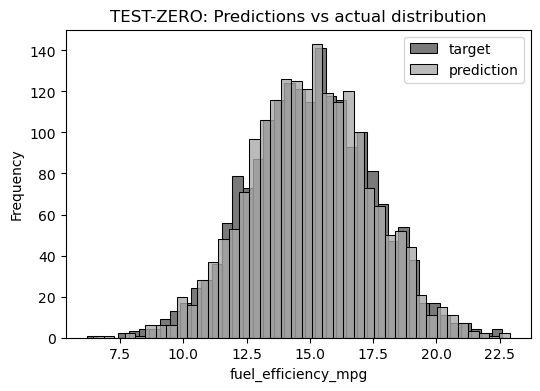

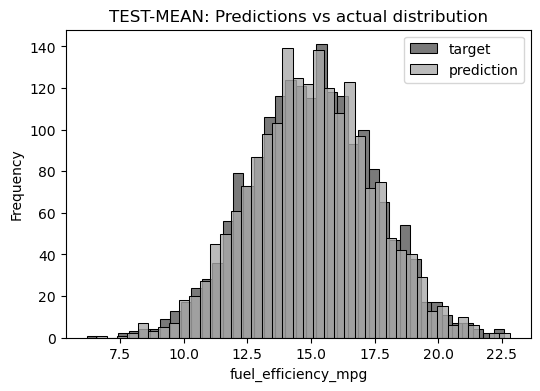

In [28]:
plt.figure(figsize=(6, 4))


sns.histplot(y_test_zero, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_test_zero, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('fuel_efficiency_mpg')
plt.title('TEST-ZERO: Predictions vs actual distribution')

plt.show()

plt.figure(figsize=(6, 4))


sns.histplot(y_test_mean, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_test_mean, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('fuel_efficiency_mpg')
plt.title('TEST-MEAN: Predictions vs actual distribution')

plt.show()

In [29]:
'''df['make'].value_counts().head(5)'''

"df['make'].value_counts().head(5)"

In [30]:
'''def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X'''

"def prepare_X(df):\n    df = df.copy()\n    features = base.copy()\n\n    df['age'] = 2017 - df.year\n    features.append('age')\n\n    for v in [2, 3, 4]:\n        feature = 'num_doors_%s' % v\n        df[feature] = (df['number_of_doors'] == v).astype(int)\n        features.append(feature)\n\n    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:\n        feature = 'is_make_%s' % v\n        df[feature] = (df['make'] == v).astype(int)\n        features.append(feature)\n\n    df_num = df[features]\n    df_num = df_num.fillna(0)\n    X = df_num.values\n    return X"

In [31]:
'''X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))'''

"X_train = prepare_X(df_train)\nw_0, w = train_linear_regression(X_train, y_train)\n\ny_pred = w_0 + X_train.dot(w)\nprint('train:', rmse(y_train, y_pred))\n\nX_val = prepare_X(df_val)\ny_pred = w_0 + X_val.dot(w)\nprint('validation:', rmse(y_val, y_pred))"

In [32]:
'''df['engine_fuel_type'].value_counts()'''

"df['engine_fuel_type'].value_counts()"

In [33]:
'''def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)',
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X'''

"def prepare_X(df):\n    df = df.copy()\n    features = base.copy()\n\n    df['age'] = 2017 - df.year\n    features.append('age')\n\n    for v in [2, 3, 4]:\n        feature = 'num_doors_%s' % v\n        df[feature] = (df['number_of_doors'] == v).astype(int)\n        features.append(feature)\n\n    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:\n        feature = 'is_make_%s' % v\n        df[feature] = (df['make'] == v).astype(int)\n        features.append(feature)\n\n    for v in ['regular_unleaded', 'premium_unleaded_(required)',\n              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:\n        feature = 'is_type_%s' % v\n        df[feature] = (df['engine_fuel_type'] == v).astype(int)\n        features.append(feature)\n\n    df_num = df[features]\n    df_num = df_num.fillna(0)\n    X = df_num.values\n    return X"

In [34]:
'''X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))'''

"X_train = prepare_X(df_train)\nw_0, w = train_linear_regression(X_train, y_train)\n\ny_pred = w_0 + X_train.dot(w)\nprint('train:', rmse(y_train, y_pred))\n\nX_val = prepare_X(df_val)\ny_pred = w_0 + X_val.dot(w)\nprint('validation:', rmse(y_val, y_pred))"

In [35]:
'''df['transmission_type'].value_counts()'''

"df['transmission_type'].value_counts()"

In [36]:
'''def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)',
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X'''

"def prepare_X(df):\n    df = df.copy()\n    features = base.copy()\n\n    df['age'] = 2017 - df.year\n    features.append('age')\n\n    for v in [2, 3, 4]:\n        feature = 'num_doors_%s' % v\n        df[feature] = (df['number_of_doors'] == v).astype(int)\n        features.append(feature)\n\n    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:\n        feature = 'is_make_%s' % v\n        df[feature] = (df['make'] == v).astype(int)\n        features.append(feature)\n\n    for v in ['regular_unleaded', 'premium_unleaded_(required)',\n              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:\n        feature = 'is_type_%s' % v\n        df[feature] = (df['engine_fuel_type'] == v).astype(int)\n        features.append(feature)\n\n    for v in ['automatic', 'manual', 'automated_manual']:\n        feature = 'is_transmission_%s' % v\n        df[feature] = (df['transmission_type'] == v).astype(int)\n        features.append(feature)\n\n    df_num = df[feature

In [37]:
'''X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))'''

"X_train = prepare_X(df_train)\nw_0, w = train_linear_regression(X_train, y_train)\n\ny_pred = w_0 + X_train.dot(w)\nprint('train:', rmse(y_train, y_pred))\n\nX_val = prepare_X(df_val)\ny_pred = w_0 + X_val.dot(w)\nprint('validation:', rmse(y_val, y_pred))"

In [38]:
'''df['driven_wheels'].value_counts()'''

"df['driven_wheels'].value_counts()"

In [39]:
'''df['market_category'].value_counts().head(5)'''

"df['market_category'].value_counts().head(5)"

In [40]:
'''df['vehicle_size'].value_counts().head(5)'''

"df['vehicle_size'].value_counts().head(5)"

In [41]:
'''df['vehicle_style'].value_counts().head(5)'''

"df['vehicle_style'].value_counts().head(5)"

In [42]:
'''def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)',
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)

    for v in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheens_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)

    for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)

    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)

    for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X'''

"def prepare_X(df):\n    df = df.copy()\n    features = base.copy()\n\n    df['age'] = 2017 - df.year\n    features.append('age')\n\n    for v in [2, 3, 4]:\n        feature = 'num_doors_%s' % v\n        df[feature] = (df['number_of_doors'] == v).astype(int)\n        features.append(feature)\n\n    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:\n        feature = 'is_make_%s' % v\n        df[feature] = (df['make'] == v).astype(int)\n        features.append(feature)\n\n    for v in ['regular_unleaded', 'premium_unleaded_(required)',\n              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:\n        feature = 'is_type_%s' % v\n        df[feature] = (df['engine_fuel_type'] == v).astype(int)\n        features.append(feature)\n\n    for v in ['automatic', 'manual', 'automated_manual']:\n        feature = 'is_transmission_%s' % v\n        df[feature] = (df['transmission_type'] == v).astype(int)\n        features.append(feature)\n\n    for v in ['front_wh

In [43]:
'''X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))'''

"X_train = prepare_X(df_train)\nw_0, w = train_linear_regression(X_train, y_train)\n\ny_pred = w_0 + X_train.dot(w)\nprint('train:', rmse(y_train, y_pred))\n\nX_val = prepare_X(df_val)\ny_pred = w_0 + X_val.dot(w)\nprint('validation:', rmse(y_val, y_pred))"

In [44]:
'''w_0'''

'w_0'

# Question 4

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which `r` gives the best RMSE?

If multiple options give the same best RMSE, select the smallest r.

Options:

- 0
- 0.01
- 1
- 10
- 100


## Regularization

In [45]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [46]:
X_train_zero = prepare_X(df_train_zero)
X_test_zero = prepare_X(df_test_zero)
X_val_zero = prepare_X(df_val_zero)

y_train_zero = df_train_zero.fuel_efficiency_mpg.values
y_val_zero = df_val_zero.fuel_efficiency_mpg.values
y_test_zero = df_test_zero.fuel_efficiency_mpg.values

In [47]:
r_list = [0, 0.01, 0.1, 1, 5, 10, 100]
rnd = 4

i = 0
w_0_reg = [0] * len(r_list)
w_reg = [0] * len(r_list)
y_pred_train_zero = [0] * len(r_list)
y_pred_test_zero = [0] * len(r_list)
y_pred_val_zero = [0] * len(r_list)
rmse_train_zero = [0] * len(r_list)
rmse_test_zero = [0] * len(r_list)
rmse_val_zero = [0] * len(r_list)

for r in r_list:
    w_0_reg[i], w_reg[i] = train_linear_regression_reg(X_train_zero, y_train_zero, r=r)
    print('r= %s, \nw_0= %.2f,         %.2f, %.2f, %.2f, %.2f' % (r, w_0_reg[i], w_reg[i][0], w_reg[i][1], w_reg[i][2], w_reg[i][3]))

    y_pred_train_zero[i] = w_0_reg[i] + X_train_zero.dot(w_reg[i])
    rmse_train_zero = rmse(y_train_zero, y_pred_train_zero[i])
    #print('train', round(rmse_train_zero, rnd))

    y_pred_val_zero[i] = w_0_reg[i] + X_val_zero.dot(w_reg[i])
    rmse_val_zero = rmse(y_val_zero, y_pred_val_zero[i])
    print('validation', round(rmse_val_zero, rnd))

    y_pred_test_zero[i] = w_0_reg[i] + X_test_zero.dot(w_reg[i])
    rmse_test_zero = rmse(y_test_zero, y_pred_test_zero[i])
    #print('test', round(rmse_test_zero, rnd))

    print()
    i += 1

r= 0, 
w_0= 28.83,         0.00, 0.00, -0.01, 0.00
validation 0.5174

r= 0.01, 
w_0= 24.93,         0.00, 0.00, -0.01, 0.00
validation 0.5171

r= 0.1, 
w_0= 11.24,         0.00, 0.00, -0.01, 0.01
validation 0.5188

r= 1, 
w_0= 1.73,         0.00, 0.00, -0.01, 0.01
validation 0.5222

r= 5, 
w_0= 0.36,         0.00, 0.00, -0.01, 0.01
validation 0.5229

r= 10, 
w_0= 0.18,         0.00, 0.00, -0.01, 0.01
validation 0.523

r= 100, 
w_0= 0.02,         0.00, 0.00, -0.01, 0.01
validation 0.5231



# Question 5

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
- Round the result to 3 decimal digits ( `round(std, 3)` )

What's the value of std?

- 0.001
- 0.006
- 0.060
- 0.600

**_NOTE:_** Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.


In [48]:
seed_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rnd = 5
i = 0

df_train_zero = [0] * len(seed_list)
df_val_zero = [0] * len(seed_list)
df_test_zero = [0] * len(seed_list)

X_train_zero = [0] * len(seed_list)
X_val_zero = [0] * len(seed_list)
X_test_zero = [0] * len(seed_list)

y_train_zero = [0] * len(seed_list)
y_val_zero = [0] * len(seed_list)
y_test_zero = [0] * len(seed_list)

w_0 = [0] * len(seed_list)
w = [0] * len(seed_list)

y_pred_train_zero = [0] * len(seed_list)
y_pred_test_zero = [0] * len(seed_list)
y_pred_val_zero = [0] * len(seed_list)

rmse_train_zero = [0] * len(seed_list)
rmse_test_zero = [0] * len(seed_list)
rmse_val_zero = [0] * len(seed_list)

for seed in seed_list:
    df_train_zero[i], df_val_zero[i], df_test_zero[i] = shuffle_and_split(df_zero, seed)

    X_train_zero[i] = prepare_X(df_train_zero[i])
    X_val_zero[i] = prepare_X(df_val_zero[i])
    X_test_zero[i] = prepare_X(df_test_zero[i])

    y_train_zero[i] = df_train_zero[i].fuel_efficiency_mpg.values
    y_val_zero[i] = df_val_zero[i].fuel_efficiency_mpg.values
    y_test_zero[i] = df_test_zero[i].fuel_efficiency_mpg.values

    w_0[i], w[i] = train_linear_regression(X_train_zero[i], y_train_zero[i])
    print('seed= %s, \nw_0= %.2f,         %.2f, %.2f, %.2f, %.2f' % (seed, w_0[i], w[i][0], w[i][1], w[i][2], w[i][3]))

    y_pred_train_zero[i] = w_0[i] + X_train_zero[i].dot(w[i])
    rmse_train_zero[i] = rmse(y_train_zero[i], y_pred_train_zero[i])
    #print('train', round(rmse_train_zero[i], rnd))

    y_pred_val_zero[i] = w_0[i] + X_val_zero[i].dot(w[i])
    rmse_val_zero[i] = rmse(y_val_zero[i], y_pred_val_zero[i])
    print('validation', round(rmse_val_zero[i], rnd))

    y_pred_test_zero[i] = w_0[i] + X_test_zero[i].dot(w[i])
    rmse_test_zero[i] = rmse(y_test_zero[i], y_pred_test_zero[i])
    #print('test', round(rmse_test_zero[i], rnd))

    print()
    i += 1

std_zero = np.std(rmse_val_zero)
print('Standard Deviation of Validation RMSEs:', round(std_zero, rnd))

seed= 0, 
w_0= 27.38,         0.00, 0.00, -0.01, 0.00
validation 0.52065

seed= 1, 
w_0= 29.02,         0.00, 0.00, -0.01, 0.00
validation 0.52134

seed= 2, 
w_0= 25.90,         0.00, 0.00, -0.01, 0.00
validation 0.52281

seed= 3, 
w_0= 28.02,         0.00, 0.00, -0.01, 0.00
validation 0.51595

seed= 4, 
w_0= 25.93,         0.00, 0.00, -0.01, 0.00
validation 0.51091

seed= 5, 
w_0= 25.90,         -0.00, 0.00, -0.01, 0.00
validation 0.52834

seed= 6, 
w_0= 25.92,         0.00, 0.00, -0.01, 0.00
validation 0.53139

seed= 7, 
w_0= 28.41,         0.00, 0.00, -0.01, 0.00
validation 0.50907

seed= 8, 
w_0= 26.48,         0.00, 0.00, -0.01, 0.00
validation 0.51474

seed= 9, 
w_0= 27.51,         -0.00, 0.00, -0.01, 0.00
validation 0.51319

Standard Deviation of Validation RMSEs: 0.00699


# Question 6

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

Options:

- 0.15
- 0.515
- 5.15
- 51.5


In [49]:
seed = 9
rnd = 4

df_train_zero, df_val_zero, df_test_zero = shuffle_and_split(df_zero, seed)

X_train_zero = prepare_X(df_train_zero)
X_val_zero = prepare_X(df_val_zero)
X_test_zero = prepare_X(df_test_zero)

y_train_zero = df_train_zero.fuel_efficiency_mpg.values
y_val_zero = df_val_zero.fuel_efficiency_mpg.values
y_test_zero = df_test_zero.fuel_efficiency_mpg.values

w_0, w = train_linear_regression_reg(X_train_zero, y_train_zero, r=0.001)
print('w_0= %.2f,         %.2f, %.2f, %.2f, %.2f' % (w_0, w[0], w[1], w[2], w[3]))

y_pred_train_zero = w_0 + X_train_zero.dot(w)
rmse_train_zero = rmse(y_train_zero, y_pred_train_zero)
#print('train', round(rmse_train_zero, rnd))

y_pred_val_zero = w_0 + X_val_zero.dot(w)
rmse_val_zero = rmse(y_val_zero, y_pred_val_zero)
#print('validation', round(rmse_val_zero, rnd))

y_pred_test_zero = w_0 + X_test_zero.dot(w)
rmse_test_zero = rmse(y_test_zero, y_pred_test_zero)
print('test', round(rmse_test_zero, rnd))

w_0= 27.09,         -0.00, 0.00, -0.01, 0.00
test 0.5158
